# Credit Score Classification of Bank Data - Project by MD Rashadul Islam

**Importing Necessary Library and Reading Data**

In [1]:
import pandas as pd
#For data manipulation and analysis.Provides data structures like DataFrames.
import matplotlib.pyplot as plt
#for creating static, animated, and interactive visualizations.
import numpy as np
#provides support for working with large, multi-dimensional arrays and matrices of numerical data, along with a wide range of mathematical functions to operate on these arrays.
import seaborn as sns
#based on Matplotlib, for creating informative and attractive statistical graphics.
from sklearn.model_selection import train_test_split
#A function for splitting your dataset into training and testing subsets
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#for building ensemble models,combines the predictions of multiple base classifiers.
from sklearn.preprocessing import StandardScaler, LabelEncoder
#StandardScaler is used for standardizing features by removing the mean and scaling to unit variance. LabelEncoder is used to convert categorical labels into numerical values.
from sklearn.linear_model import LogisticRegression
#for binary and multi-class classification tasks.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#classification_report: Generates a detailed classification report with various metrics like precision, recall, and F1-score.
#accuracy_score: Computes the accuracy of a classification model.
#confusion_matrix: Calculates a confusion matrix to evaluate the performance of a classifier.
from xgboost import XGBClassifier
#XGBoost is a popular gradient boosting algorithm used for classification and regression tasks.
from imblearn.ensemble import BalancedRandomForestClassifier
#for building ensemble models,combines the predictions of multiple base classifiers, designed for imbalanced datasets.
from sklearn.svm import SVC
#SVC is a powerful algorithm for both classification and regression tasks
from sklearn.tree import DecisionTreeClassifier
#A non-linear model that partitions the data into subsets based on feature values.
from sklearn.neighbors import KNeighborsClassifier
#classifies data points based on the majority class among their k-nearest neighbors
from keras.models import Sequential
from keras.layers import Dense
#Sequential is used to create a linear stack of neural network layers, and Dense is a fully connected layer.
import tensorflow as tf
#an open-source machine learning framework developed by Google.
from tensorflow import keras
#Keras is being used as a high-level API for building and training deep learning models, and it is integrated with TensorFlow.

import warnings
#Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('/content/train.csv') #for train data

In [3]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
test_df = pd.read_csv('/content/test.csv') #for test data

In [6]:
test_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

**Data Visualisation**

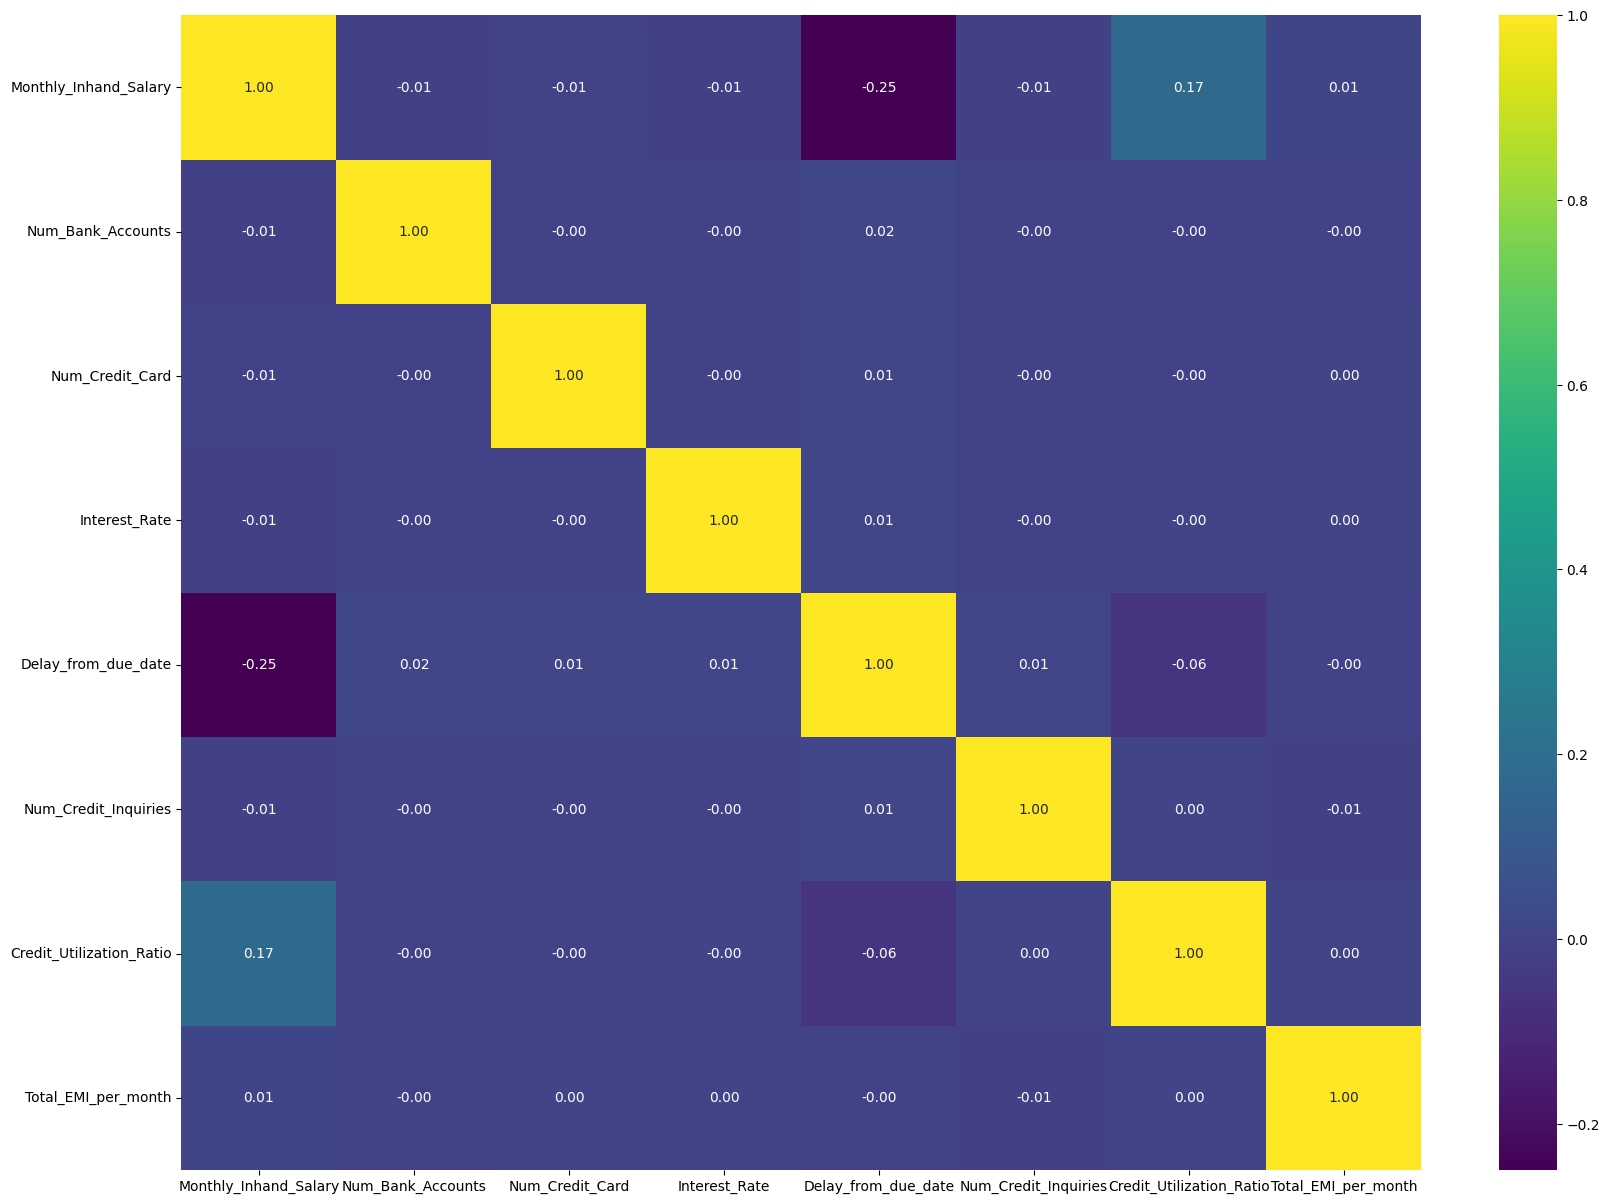

In [8]:
cr=train_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="viridis")
plt.show()

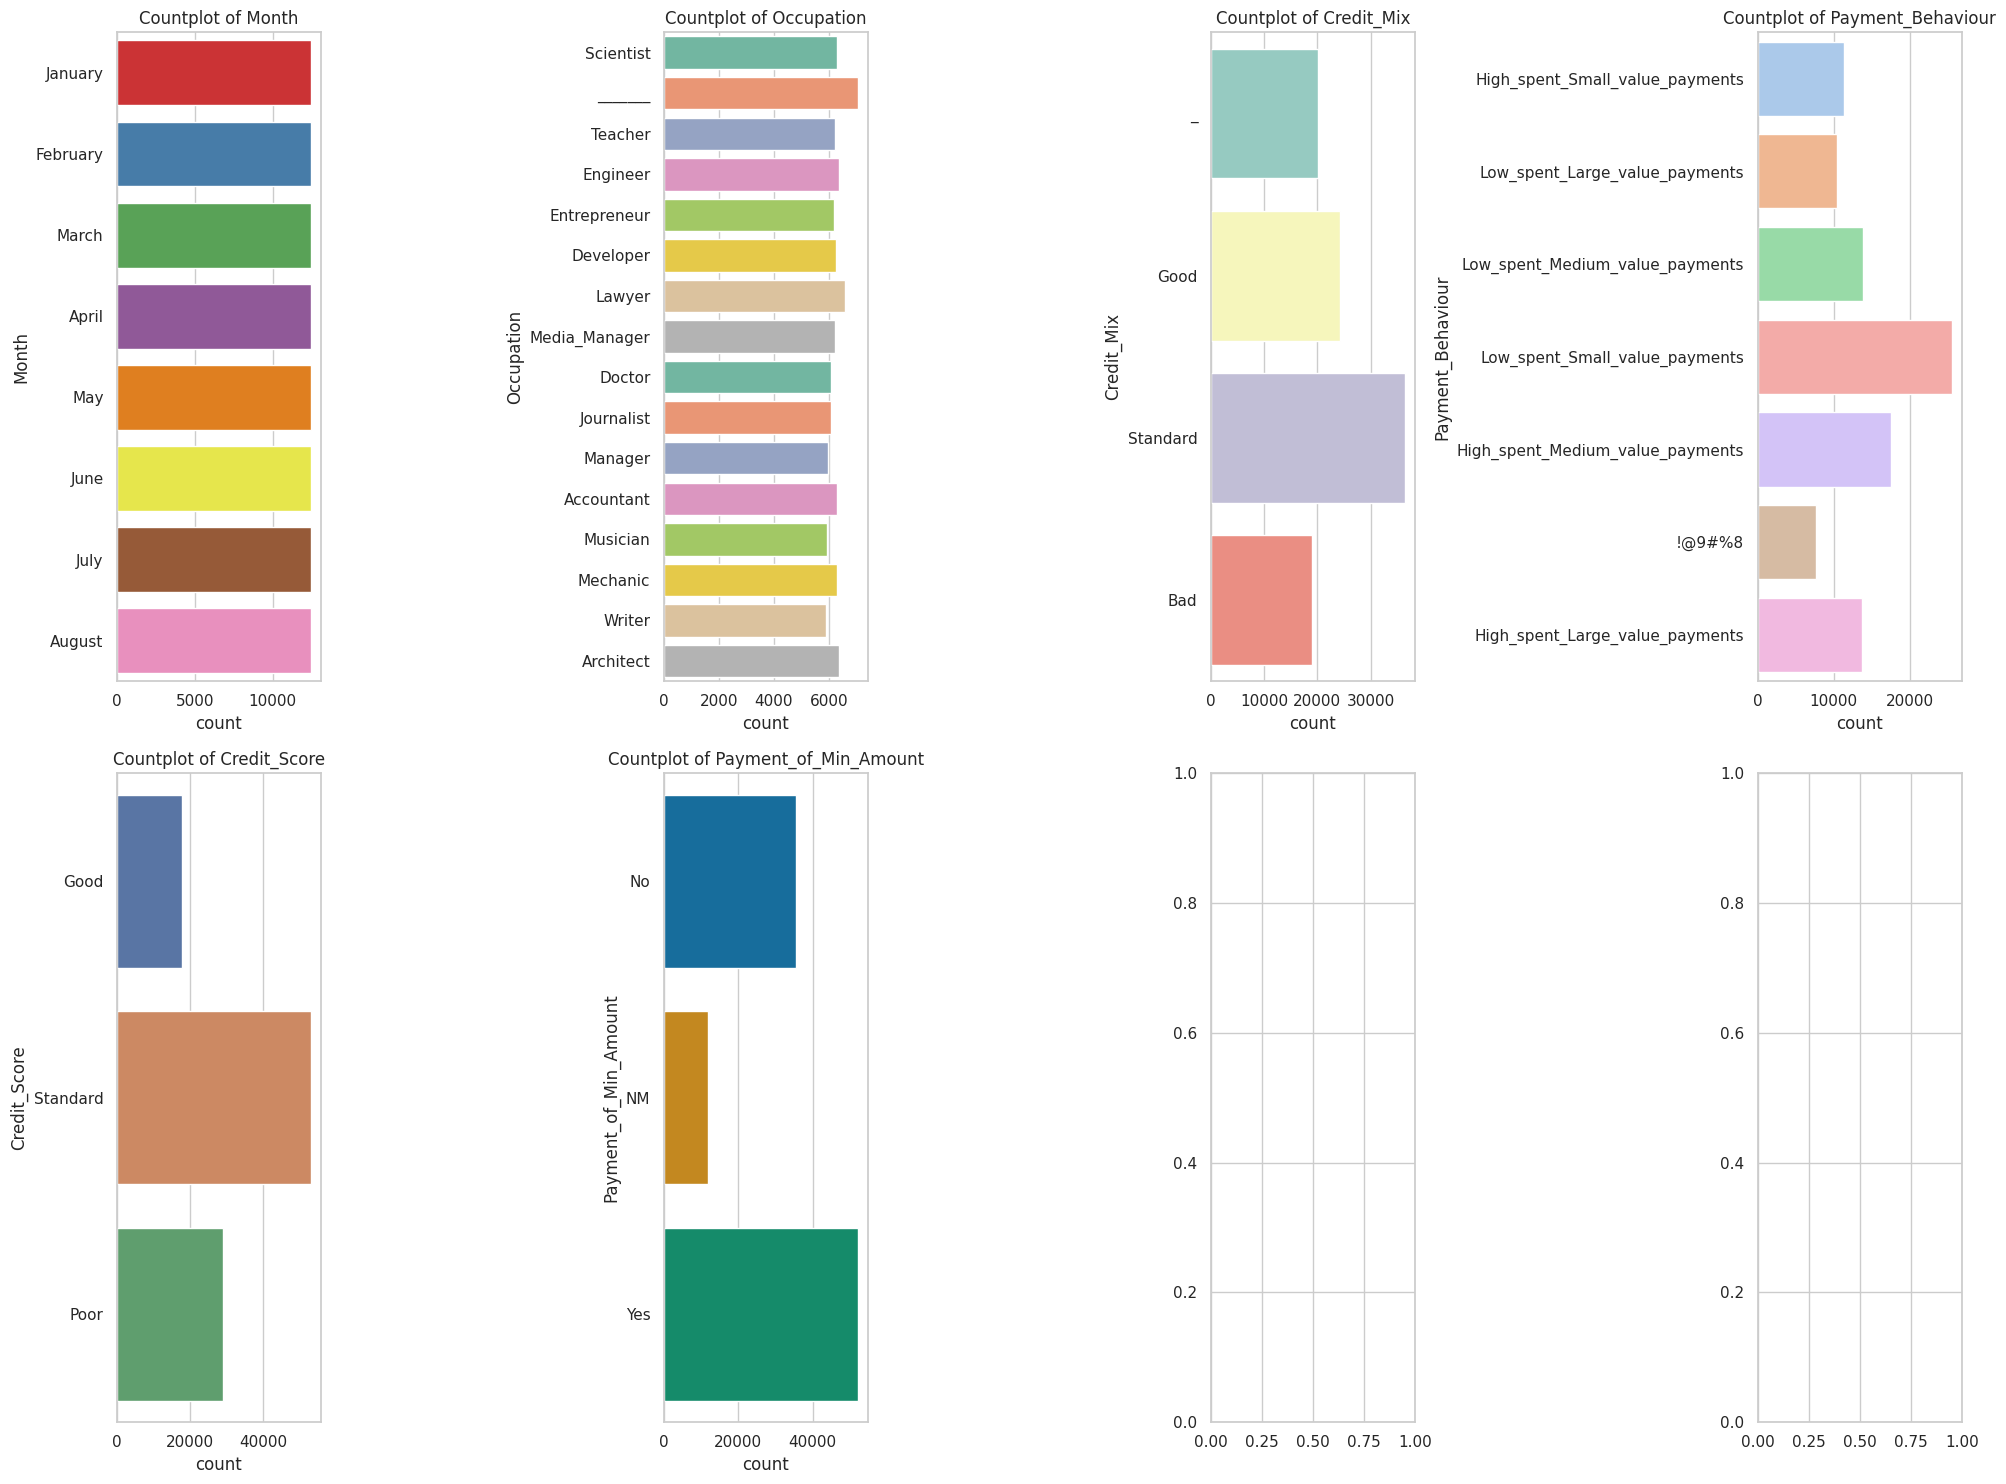

In [9]:
columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_Behaviour',
           'Credit_Score', 'Payment_of_Min_Amount']
palettes = ['Set1', 'Set2', 'Set3', 'pastel', 'deep', 'colorblind']

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))

axes = axes.flatten()
for i, (col, palette) in enumerate(zip(columns, palettes)):
    sns.countplot(y=col, data=train_df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

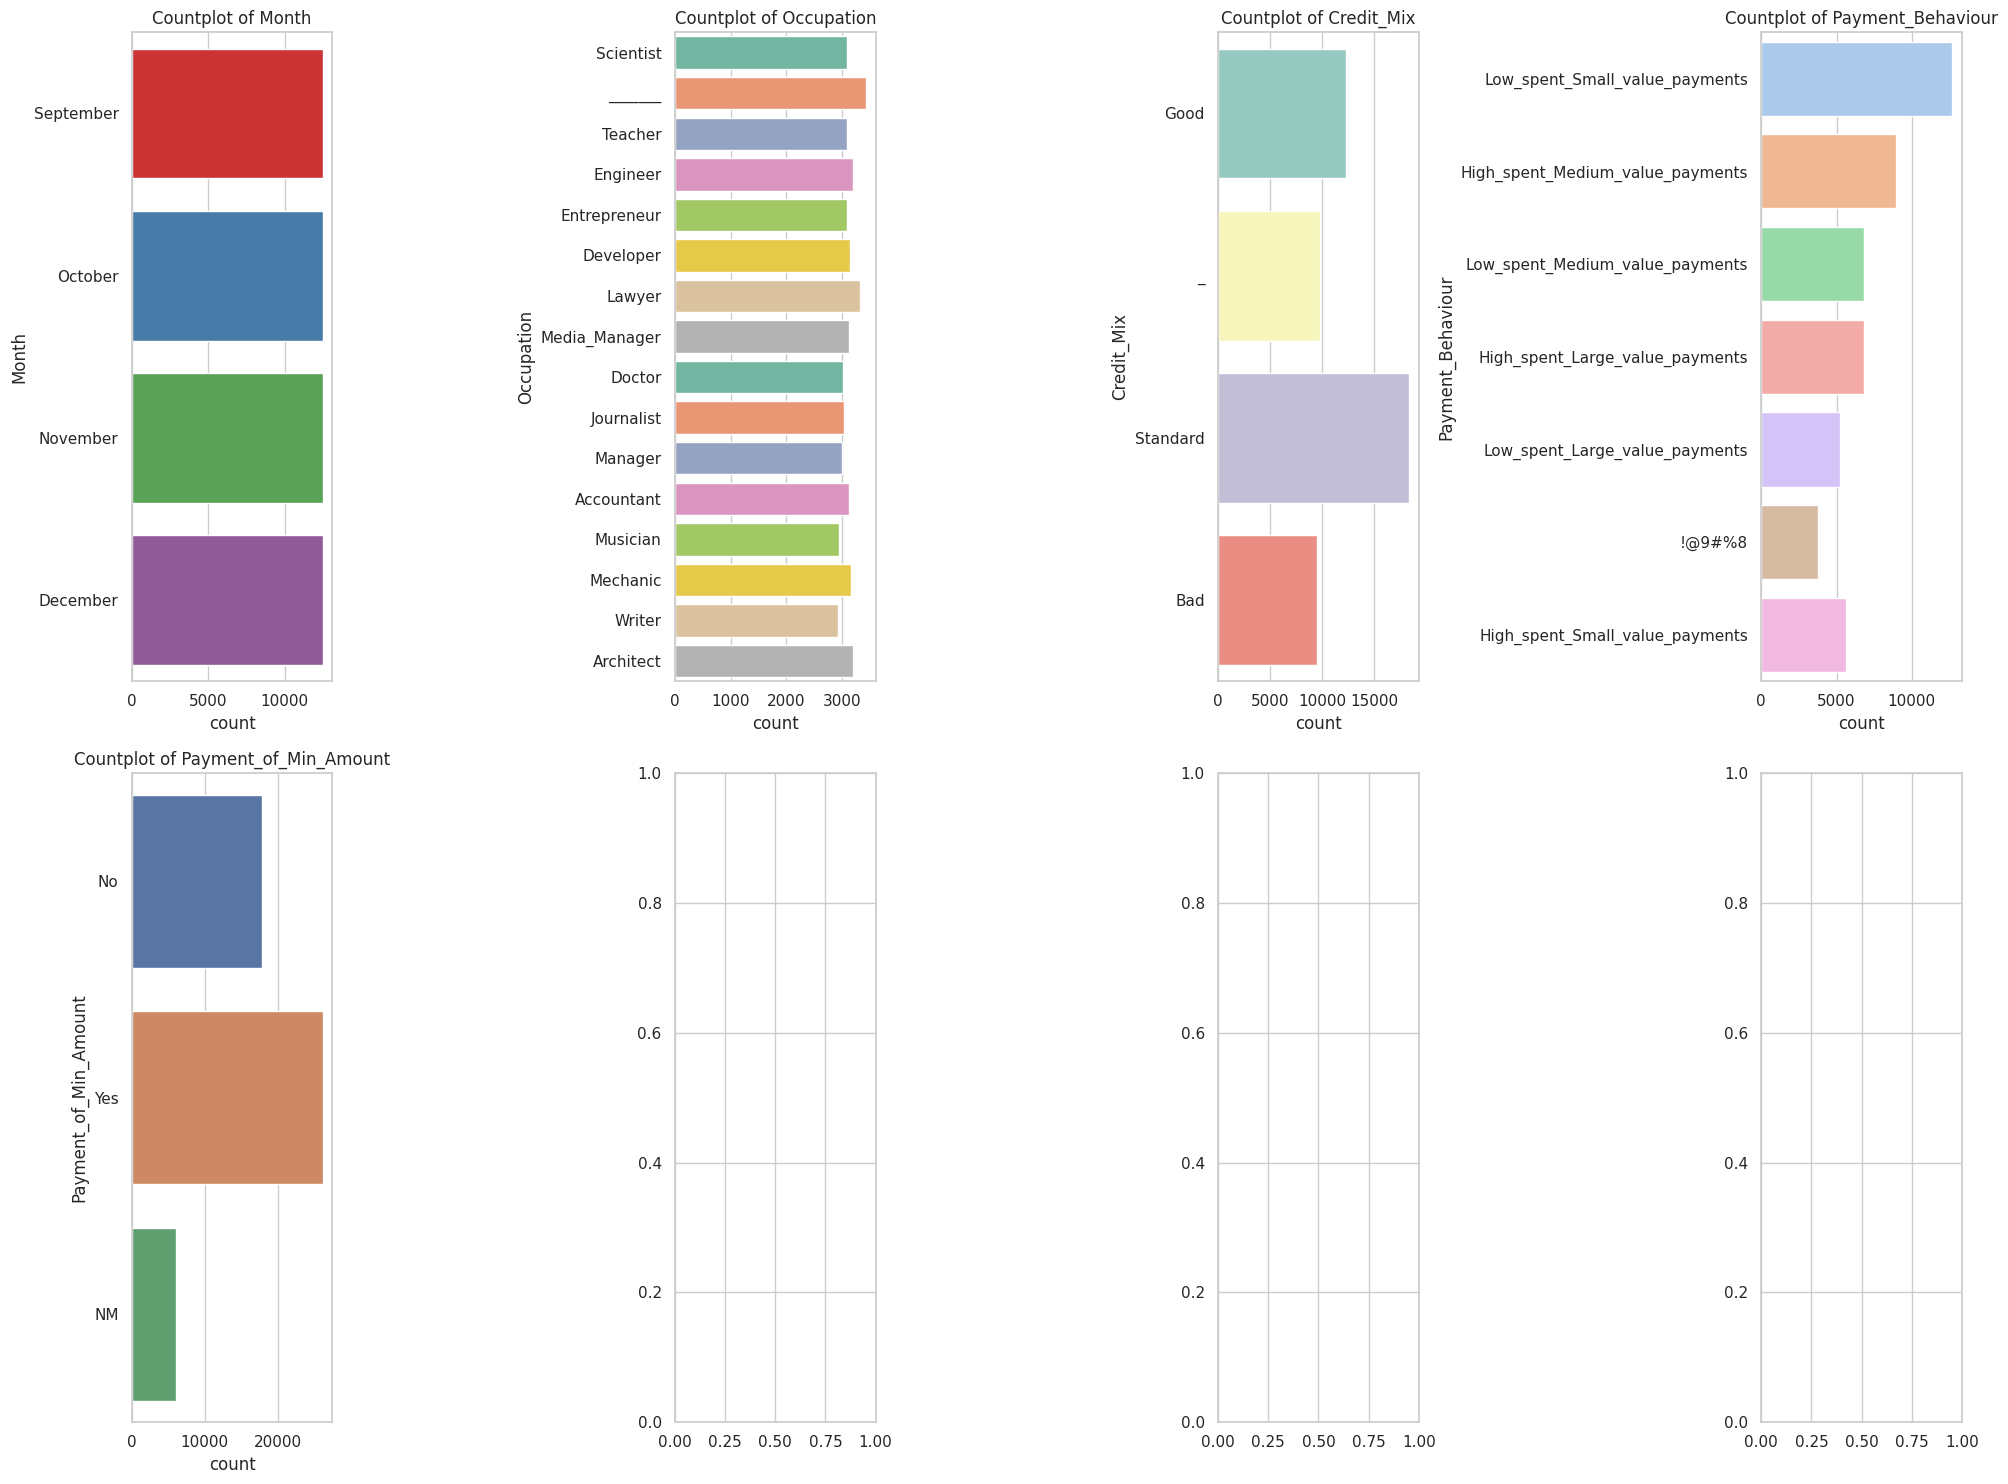

In [10]:
columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_Behaviour',
          'Payment_of_Min_Amount']
palettes = ['Set1', 'Set2', 'Set3', 'pastel', 'deep', 'colorblind']

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))

axes = axes.flatten()
for i, (col, palette) in enumerate(zip(columns, palettes)):
    sns.countplot(y=col, data=test_df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

**Dropping and Processing Data**

In [11]:
train_df = train_df.drop(['ID','Name','Age','SSN','Occupation'],axis = 'columns')

In [12]:
train_df

,Customer_ID,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [13]:
# Handling missing values
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

In [14]:
# Combining training and test data for label encoding consistency
combined_df = pd.concat([train_df, test_df])

In [15]:
print(combined_df.dtypes)

Customer_ID                  object
Month                        object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
ID                           object
Name                         object
Age                          object
SSN                          object
Occupation                  

In [16]:
combined_df['Monthly_Balance'] = combined_df['Monthly_Balance'].astype(str)

In [17]:
combined_df['Credit_Score'] = combined_df['Credit_Score'].astype(str)

**Encoding and Spliting into features and target**

In [18]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for column in combined_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_df[column] = le.fit_transform(combined_df[column])
    label_encoders[column] = le

In [19]:
# Split data into features and target
X_train = combined_df[:len(train_df)].drop('Credit_Score', axis=1)
y_train = combined_df[:len(train_df)]['Credit_Score']
X_test = combined_df[len(train_df):]

**Scaling**

In [20]:
X_train

,Customer_ID,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,ID,Name,Age,SSN,Occupation
0,12320,4,6730,1824.843333,3,4,3,348,128,3,...,1,49.574949,122239,3,63600,50000,10139,976,12501,16
1,12320,3,6730,1824.843333,3,4,3,348,128,-1,...,1,49.574949,11499,4,47307,50000,10139,976,12501,16
2,12320,7,6730,1824.843333,3,4,3,348,128,3,...,1,49.574949,123271,5,73031,50000,10139,976,12501,16
3,12320,0,6730,1824.843333,3,4,3,348,128,5,...,1,49.574949,45351,6,17355,50000,10139,976,12501,16
4,12320,8,6730,1824.843333,3,4,3,348,128,6,...,1,49.574949,82983,2,77693,50000,10139,976,12501,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,8833,0,12883,3359.415833,4,6,7,250,683,23,...,1,35.104023,104496,1,114553,50000,10139,976,12501,16
99996,8833,8,12883,3359.415833,4,6,7,250,683,18,...,1,35.104023,97751,2,117111,50000,10139,976,12501,16
99997,8833,6,12883,3359.415833,4,6,5729,250,683,27,...,1,35.104023,55607,1,119718,50000,10139,976,12501,16
99998,8833,5,12883,3359.415833,4,6,7,250,683,20,...,1,35.104023,58499,4,67023,50000,10139,976,12501,16


In [21]:
X_test

,Customer_ID,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,ID,Name,Age,SSN,Occupation
0,12320,11,6730,1824.843333,3,4,3,348,128,3,...,49.574949,54992,6,10003,3,8246,84,156,10205,12
1,12320,10,6730,1824.843333,3,4,3,348,128,3,...,49.574949,48491,2,85592,3,8251,84,171,10205,12
2,12320,9,6730,1824.843333,3,4,3,348,128,-1,...,49.574949,26882,5,35115,3,8258,84,171,10205,12
3,12320,2,6730,1824.843333,3,4,3,348,128,4,...,49.574949,80279,2,78671,3,8265,84,183,10205,12
4,1066,11,11576,3037.986667,2,4,6,3,684,3,...,18.816215,80632,1,115379,3,8314,7491,225,53,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7857,2,7330,1929.906667,10,8,29,396,4913,33,...,60.964772,26134,6,41640,3,31393,7932,523,406,1
49996,8833,11,12883,1929.906667,4,6,7,299,683,20,...,35.104023,39860,6,99971,3,31394,6528,184,1009,9
49997,8833,10,12883,3359.415833,4,6,7,250,683,23,...,35.104023,136496,4,81106,3,31395,6528,184,1009,9
49998,8833,9,12883,3359.415833,4,6,7,299,683,21,...,35.104023,134814,3,111735,3,31396,6528,184,1009,9


In [22]:
# Initialize StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = X_train.columns

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test[columns_to_scale])

**Encode , Split, Classify and Result**

In [23]:
# Encode the target variable 'y_train'
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)

In [24]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)

In [25]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "K Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Balanced Random Forest": BalancedRandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "ANN": keras.Sequential([
        keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax')
    ])
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    if name == "ANN":
        if y_train.dtype == 'O':  # Convert labels to integers for ANN
            le = LabelEncoder()
            y_train_encoded = le.fit_transform(y_train)
            y_val_encoded = le.transform(y_val)

            clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            clf.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=0)
            y_pred_prob = clf.predict(X_val)
            y_pred = np.argmax(y_pred_prob, axis=1)
        else:
            clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            clf.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
            y_pred_prob = clf.predict(X_val)
            y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy

# Display results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_val, y_pred))
    print("="*50)


625/625 [==============================] - 1s 1ms/step
Logistic Regression: Accuracy = 0.5911
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.56      3527
           1       0.64      0.63      0.63      5874
           2       0.71      0.68      0.69     10599

    accuracy                           0.65     20000
   macro avg       0.63      0.64      0.63     20000
weighted avg       0.66      0.65      0.65     20000

SVM: Accuracy = 0.6316
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.56      3527
           1       0.64      0.63      0.63      5874
           2       0.71      0.68      0.69     10599

    accuracy                           0.65     20000
   macro avg       0.63      0.64      0.63     20000
weighted avg       0.66      0.65      0.65     20000

K Neighbors: Accuracy = 0.5911
K Neighbors Classifi

*   Precision measures how many of the predicted positive instances were actually positive.
*   Recall measures how many of the actual positive instances were correctly predicted
*   The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. Higher F1-scores indicate better model performance.
*   The support represents the number of instances in each class in your dataset.
*   Accuracy is the ratio of correctly predicted instances to the total number of instances.
*   Macro-averaging calculates the metric independently for each class and then takes the average. It gives equal weight to each class.
*   Weighted averaging also calculates the metric for each class, but it gives more weight to classes with larger support.





**Confusion Matrix**

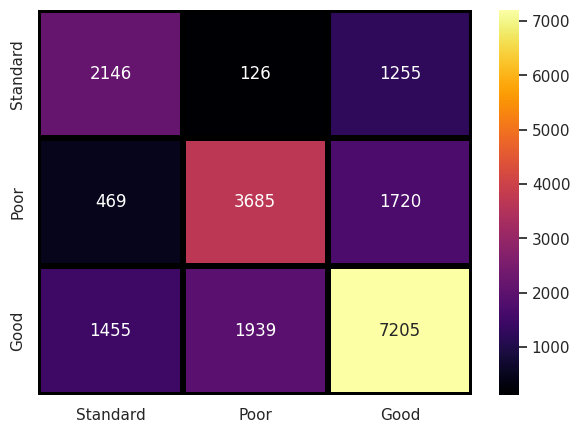

In [26]:
cf_mat=confusion_matrix(y_val, y_pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="inferno",lw=4,linecolor="black")
plt.show()

**Comparison Between models**

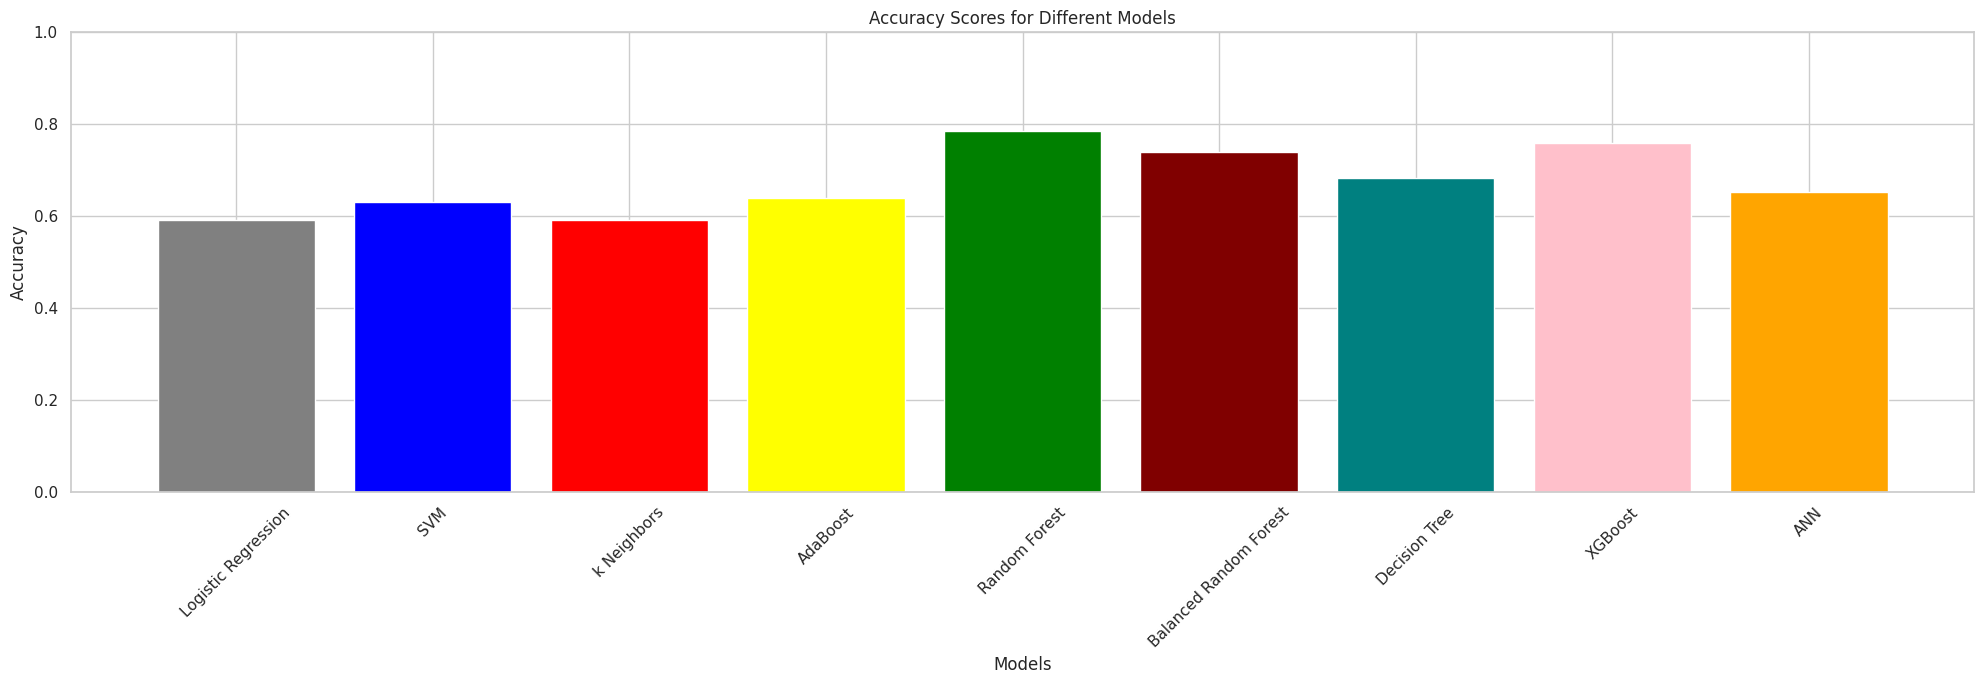

In [27]:
models = ['Logistic Regression', 'SVM', 'k Neighbors', 'AdaBoost', 'Random Forest', 'Balanced Random Forest', 'Decision Tree', 'XGBoost', 'ANN']
accuracy_scores = [0.5911, 0.6316, 0.5911, 0.6402, 0.7850, 0.7386, 0.6837, 0.7586, 0.6518]

plt.figure(figsize=(20, 7))
plt.bar(models, accuracy_scores, color=['grey', 'blue', 'red', 'yellow', 'green', 'maroon', 'teal', 'pink', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()